### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

sns.set()

### Loading Data

In [3]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\M.Tech\ML\Apriori Algorithm\Mall_data.csv')
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


### Preprocessing

In [6]:
data['Item'] = data['Item'].str.lower()

In [7]:
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam
5,2016-10-30,10:07:57,3,cookies
6,2016-10-30,10:08:41,4,muffin
7,2016-10-30,10:13:03,5,coffee
8,2016-10-30,10:13:03,5,pastry
9,2016-10-30,10:13:03,5,bread


In [9]:
(data['Item'] == 'none').value_counts()

False    20507
True       786
Name: Item, dtype: int64

In [11]:
data = data.drop(data[data.Item == 'none'].index)

In [12]:
(data['Item'] == 'none').value_counts()

False    20507
Name: Item, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
dtypes: int64(1), object(3)
memory usage: 801.1+ KB


### Item Exploration

In [14]:
data['Item'].nunique()

94

In [24]:
data['Item'].unique()

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'tartine',
       'basket', 'mineral water', 'farm house', 'fudge', 'juice',
       "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pintxos', 

In [33]:
items = data['Item'].value_counts()
items = pd.DataFrame(items)
items.head()

,Item
coffee,5471
bread,3325
tea,1435
cake,1025
pastry,856


In [40]:
data.groupby('Item').size().sort_values(ascending=False).head(10)

Item
coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
dtype: int64

<AxesSubplot:xlabel='Item'>

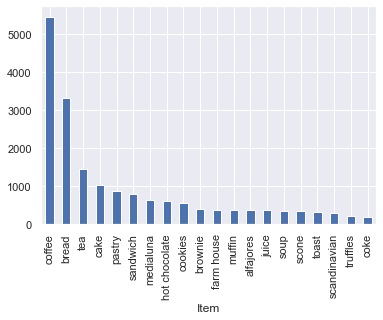

In [47]:
data.groupby('Item').size().sort_values(ascending=False).head(20).plot(kind='bar')

### Understanding how data is working

In [60]:
combined_data = pd.DataFrame({'items' : data.groupby('Transaction')['Item'].unique(),
                              'items_count' : data.groupby('Transaction')['Item'].nunique()})
combined_data.reset_index(inplace=True)
combined_data.head(10)

,Transaction,items,items_count
0,1,[bread],1
1,2,[scandinavian],1
2,3,"[hot chocolate, jam, cookies]",3
3,4,[muffin],1
4,5,"[coffee, pastry, bread]",3
5,6,"[medialuna, pastry, muffin]",3
6,7,"[medialuna, pastry, coffee, tea]",4
7,8,"[pastry, bread]",2
8,9,"[bread, muffin]",2
9,10,"[scandinavian, medialuna]",2


### Data Exploration

In [57]:
data['Date'].min()

'2016-10-30'

In [58]:
data['Date'].max()

'2017-04-09'

In [59]:
data['Date'].nunique()

159

## <font color="green">Apriori Algorithm</font>

In [66]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Transforming data
Making items as columns and each transaction as a row and count same items bought in one transaction

In [85]:
dt = data.groupby(['Transaction','Item']).count().unstack().reset_index().set_index('Transaction').fillna(0)
dt.head(20)

Date                                                     \
Item        adjustment afternoon with the baker alfajores argentina night   
Transaction                                                                 
1                  0.0                      0.0       0.0             0.0   
2                  0.0                      0.0       0.0             0.0   
3                  0.0                      0.0       0.0             0.0   
4                  0.0                      0.0       0.0             0.0   
5                  0.0                      0.0       0.0             0.0   
6                  0.0                      0.0       0.0             0.0   
7                  0.0                      0.0       0.0             0.0   
8                  0.0                      0.0       0.0             0.0   
9                  0.0                      0.0       0.0             0.0   
10                 0.0                      0.0       0.0             0.0   
11                 0.0                      0.0       0.0             0.0   
12                 0.0                      0.0       0.0             0.0   
13                 0.0                      0.0       0.0             0.0   
14                 0.0                      0.0       0.0             0.0   
15                 0.0                      0.0       0.0             0.0   
16                 0.0                      0.0       0.0             0.0   
17                 0.0                      0.0       0.0             0.0   
18                 0.0                      0.0       0.0             0.0   
19                 0.0                      0.0       0.0             0.0   
20                 0.0                      0.0       0.0             0.0   

                                                                  ...  \
Item        art tray bacon baguette bakewell bare popcorn basket  ...   
Transaction                                                       ...   
1                0.0   0.0      0.0      0.0          0.0    0.0  ...   
2                0.0   0.0      0.0      0.0          0.0    0.0  ...   
3                0.0   0.0      0.0      0.0          0.0    0.0  ...   
4                0.0   0.0      0.0      0.0          0.0    0.0  ...   
5                0.0   0.0      0.0      0.0          0.0    0.0  ...   
6                0.0   0.0      0.0      0.0          0.0    0.0  ...   
7                0.0   0.0      0.0      0.0          0.0    0.0  ...   
8                0.0   0.0      0.0      0.0          0.0    0.0  ...   
9                0.0   0.0      0.0      0.0          0.0    0.0  ...   
10               0.0   0.0      0.0      0.0          0.0    0.0  ...   
11               0.0   0.0      0.0      0.0          0.0    0.0  ...   
12               0.0   0.0      0.0      0.0          0.0    0.0  ...   
13               0.0   0.0      0.0      0.0          0.0    1.0  ...   
14               0.0   0.0      0.0      0.0          0.0    0.0  ...   
15               0.0   0.0      0.0      0.0          0.0    0.0  ...   
16               0.0   0.0      0.0      0.0          0.0    0.0  ...   
17               0.0   0.0      0.0      0.0          0.0    0.0  ...   
18               0.0   0.0      0.0      0.0          0.0    0.0  ...   
19               0.0   0.0      0.0      0.0          0.0    0.0  ...   
20               0.0   0.0      0.0      0.0          0.0    0.0  ...   

                Time                                                          \
Item        the bart the nomad tiffin toast truffles tshirt valentine's card   
Transaction                                                                    
1                0.0       0.0    0.0   0.0      0.0    0.0              0.0   
2                0.0       0.0    0.0   0.0      0.0    0.0              0.0   
3                0.0       0.0    0.0   0.0      0.0    0.0              0.0   
4                0.0       0.0    0.0   0.0      0.0    0.0              0.0   
5     

In [86]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
dt = dt.applymap(encode_units)

In [89]:
dt.head(20)

Date                                                     \
Item        adjustment afternoon with the baker alfajores argentina night   
Transaction                                                                 
1                    0                        0         0               0   
2                    0                        0         0               0   
3                    0                        0         0               0   
4                    0                        0         0               0   
5                    0                        0         0               0   
6                    0                        0         0               0   
7                    0                        0         0               0   
8                    0                        0         0               0   
9                    0                        0         0               0   
10                   0                        0         0               0   
11                   0                        0         0               0   
12                   0                        0         0               0   
13                   0                        0         0               0   
14                   0                        0         0               0   
15                   0                        0         0               0   
16                   0                        0         0               0   
17                   0                        0         0               0   
18                   0                        0         0               0   
19                   0                        0         0               0   
20                   0                        0         0               0   

                                                                  ...  \
Item        art tray bacon baguette bakewell bare popcorn basket  ...   
Transaction                                                       ...   
1                  0     0        0        0            0      0  ...   
2                  0     0        0        0            0      0  ...   
3                  0     0        0        0            0      0  ...   
4                  0     0        0        0            0      0  ...   
5                  0     0        0        0            0      0  ...   
6                  0     0        0        0            0      0  ...   
7                  0     0        0        0            0      0  ...   
8                  0     0        0        0            0      0  ...   
9                  0     0        0        0            0      0  ...   
10                 0     0        0        0            0      0  ...   
11                 0     0        0        0            0      0  ...   
12                 0     0        0        0            0      0  ...   
13                 0     0        0        0            0      1  ...   
14                 0     0        0        0            0      0  ...   
15                 0     0        0        0            0      0  ...   
16                 0     0        0        0            0      0  ...   
17                 0     0        0        0            0      0  ...   
18                 0     0        0        0            0      0  ...   
19                 0     0        0        0            0      0  ...   
20                 0     0        0        0            0      0  ...   

                Time                                                          \
Item        the bart the nomad tiffin toast truffles tshirt valentine's card   
Transaction                                                                    
1                  0         0      0     0        0      0                0   
2                  0         0      0     0        0      0                0   
3                  0         0      0     0        0      0                0   
4                  0         0      0     0        0      0                0   
5     

In [92]:
frequent_items = apriori(dt,min_support=0.01,use_colnames=True)

In [93]:
frequent_items

,support,itemsets
0,0.036344,"((Date, alfajores))"
1,0.016059,"((Date, baguette))"
2,0.327205,"((Date, bread))"
3,0.040042,"((Date, brownie))"
4,0.103856,"((Date, cake))"
...,...,...
418,0.011199,"((Date, pastry), (Time, bread), (Time, coffee)..."
419,0.010037,"((Time, tea), (Date, tea), (Time, coffee), (Da..."
420,0.010037,"((Date, bread), (Time, bread), (Time, coffee),..."
421,0.011199,"((Date, pastry), (Date, bread), (Time, bread),..."


### Metrics Involved
- support
- confidence
- lift
- leverage
- conviction

we are using "Lift" metric

In [94]:
rules = association_rules(frequent_items,metric="lift",min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Date, coffee))","((Date, alfajores))",0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,"((Date, alfajores))","((Date, coffee))",0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,"((Time, alfajores))","((Date, alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf
3,"((Date, alfajores))","((Time, alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf
4,"((Time, coffee))","((Date, alfajores))",0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936


In [102]:
rules[(rules['lift']>=1) & (rules['confidence']>=0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"((Date, alfajores))","((Date, coffee))",0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,"((Time, alfajores))","((Date, alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf
3,"((Date, alfajores))","((Time, alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf
5,"((Date, alfajores))","((Time, coffee))",0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
6,"((Date, baguette))","((Time, baguette))",0.016059,0.016059,0.016059,1.000000,62.269737,0.015801,inf
...,...,...,...,...,...,...,...,...,...
2222,"((Time, tea), (Date, coffee), (Date, cake))","((Time, coffee), (Date, tea), (Time, cake))",0.010037,0.010037,0.010037,1.000000,99.631579,0.009936,inf
2225,"((Time, coffee), (Date, tea), (Time, cake))","((Time, tea), (Date, coffee), (Date, cake))",0.010037,0.010037,0.010037,1.000000,99.631579,0.009936,inf
2226,"((Time, coffee), (Date, tea), (Date, cake))","((Time, tea), (Date, coffee), (Time, cake))",0.010037,0.010037,0.010037,1.000000,99.631579,0.009936,inf
2227,"((Date, coffee), (Date, tea), (Time, cake))","((Time, tea), (Time, coffee), (Date, cake))",0.010037,0.010037,0.010037,1.000000,99.631579,0.009936,inf
